In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-speed-prediction-dataset/wind_dataset.csv


In [13]:
wind_df = pd.read_csv("/kaggle/input/wind-speed-prediction-dataset/wind_dataset.csv")
wind_df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [15]:
wind = wind_df['WIND']
wind

0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
6569    14.46
6570    14.33
6571    19.17
6572    18.08
6573    19.25
Name: WIND, Length: 6574, dtype: float64

In [30]:
def choose_sample(sample_size, data):
    np.random.seed(42)
    sample = np.random.choice(data, size = sample_size, replace = False)
    return pd.DataFrame(sample), sample

In [31]:
sample_data, sample_np = choose_sample(1000, wind)
sample_data.head(10)

,0
0,6.46
1,4.58
2,9.25
3,17.67
4,4.17
5,11.46
6,13.79
7,11.75
8,6.63
9,7.04


In [32]:
import pandas as pd

def calculate_statistics(df):
    # Tính trung bình (mean) của từng cột
    mean_values = df.mean()
    print("Mean values:")
    print(mean_values)
    print("\n" + "-"*40)

    # Tính phương sai (variance) của từng cột
    variance_values = df.var()
    print("Variance values:")
    print(variance_values)
    print("\n" + "-"*40)

    # Tính độ dài (len) của từng cột
    length_values = df.count()
    print("Length values:")
    print(length_values)
    print("\n" + "-"*40)


# Gọi hàm để tính toán và in kết quả
calculate_statistics(sample_data)


Mean values:
0    9.93945
dtype: float64

----------------------------------------
Variance values:
0    26.195032
dtype: float64

----------------------------------------
Length values:
0    1000
dtype: int64

----------------------------------------


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import sem, t
from sklearn.utils import resample
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats


In [22]:
# prompt: Take TWO items and give their prior distributions for the mean value.

p1_mu = stats.norm(9.5, 26)

p2_mu = stats.norm(10, 26.5)

print(f"Prior distribution for N(9.5,26): {float(p1_mu.mean())}")
print(f"Prior distribution for N(10, 26.5): {float(p2_mu.mean())}")


Prior distribution for N(9.5,26): 9.5
Prior distribution for N(10, 26.5): 10.0


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def posterior_distribution(prior_mu, prior_var, sample_mean, sample_var, sample_size):
    # Tính toán các tham số cho phân phối hậu nghiệm
    posterior_mean = (prior_mu / prior_var + sample_mean / (sample_var / sample_size)) / (1 / prior_var + 1 / (sample_var / sample_size))
    posterior_var = 1 / (1 / prior_var + 1 / (sample_var / sample_size))
    
    return posterior_mean, posterior_var

# Cho p1_mu
prior_mu_1 = 9.5  # Giá trị trung bình tiên nghiệm
prior_var_1 = 26  # Phương sai tiên nghiệm

# Cho p2_mu
prior_mu_2 = 10 
prior_var_2 = 26.5

sample_mean = np.mean(sample_np)  # Trung bình mẫu
sample_var = np.var(sample_np)  # Phương sai của mẫu
sample_size = 1000  # Số lượng mẫu

# Tính phân phối hậu nghiệm
posterior_mean_1, posterior_var_1 = posterior_distribution(prior_mu_1, prior_var_1, sample_mean, sample_var, sample_size)

posterior_mean_2, posterior_var_2 = posterior_distribution(prior_mu_2, prior_var_2, sample_mean, sample_var, sample_size)

# In kết quả
print(f"Posterior for Prior 1:")
print(f"Mean: {posterior_mean_1:.2f}")
print(f"Variance: {posterior_var_1:.2f}")
print()

print(f"Posterior for Prior 2:")
print(f"Mean: {posterior_mean_2:.2f}")
print(f"Variance: {posterior_var_2:.2f}")

Posterior for Prior 1:
Mean: 9.94
Variance: 0.03

Posterior for Prior 2:
Mean: 9.94
Variance: 0.03


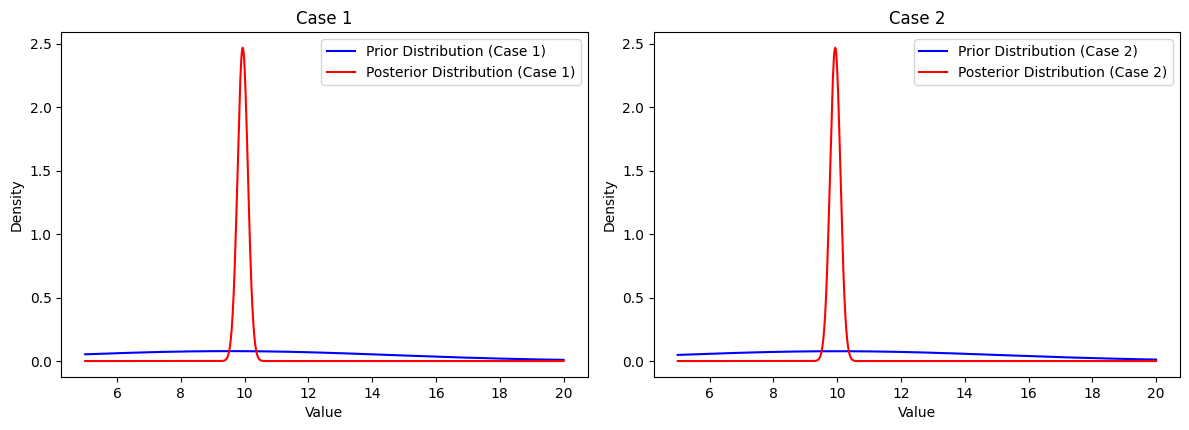

In [36]:
# Tạo một khoảng giá trị để vẽ
x = np.linspace(5, 20, 1000)

# Phân phối tiên nghiệm
prior_dist_1 = norm.pdf(x, prior_mu_1, np.sqrt(prior_var_1))
prior_dist_2 = norm.pdf(x, prior_mu_2, np.sqrt(prior_var_2))

# Phân phối hậu nghiệm
posterior_dist_1 = norm.pdf(x, posterior_mean_1, np.sqrt(posterior_var_1))
posterior_dist_2 = norm.pdf(x, posterior_mean_2, np.sqrt(posterior_var_2))

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Biểu đồ phân phối tiên nghiệm, khả năng, và hậu nghiệm cho trường hợp 1
plt.subplot(2, 2, 1)
plt.plot(x, prior_dist_1, label="Prior Distribution (Case 1)", color='blue')
plt.plot(x, posterior_dist_1, label="Posterior Distribution (Case 1)", color='red')
plt.title("Case 1")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")

# Biểu đồ phân phối tiên nghiệm, khả năng, và hậu nghiệm cho trường hợp 2
plt.subplot(2, 2, 2)
plt.plot(x, prior_dist_2, label="Prior Distribution (Case 2)", color='blue')
plt.plot(x, posterior_dist_2, label="Posterior Distribution (Case 2)", color='red')
plt.title("Case 2")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()